In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

In [33]:
train=pd.read_excel(r'蔬菜价格(整理).xls')
train=train.sort_values(by=['日期'])
date=train['日期'].values
train=train.drop(labels=['日期'],axis=1)
feature=train.columns
train.head()

,西红柿,大白菜,菠菜,葱,大蒜,黄瓜,茄子,芹菜,土豆,鲜蘑菇,香菜,油菜,元葱,芸豆,茼蒿,生姜,山药
931,1.3,0.9,3,1.4,1.0,2.0,1.0,1.1,1.7,3.6,2,1.2,0.9,2.4,3.6,3.6,4.0
930,1.4,0.9,4,1.6,1.0,2.4,1.0,1.1,0.7,3.6,2.4,1,0.9,2.6,3.6,3.6,4.0
929,1.4,1.0,4.5,1.7,1.0,2.4,1.2,1.1,1.7,3.6,2.4,1,0.9,2.4,3.6,3.6,4.0
928,1.4,1.0,4,1.7,1.2,2.4,1.4,1.1,1.6,5,2.4,1,0.8,2.2,4.2,3.0,4.0
927,1.4,1.0,4,1.7,1.2,2.4,1.4,1.1,1.6,5,2.4,1,0.8,2.3,4.2,3.6,3.8


In [34]:

blank=train.iloc[842,14]
for i in range(len(train)):
    for index,j in enumerate(train.iloc[i]):
        if train.iloc[i,index]==blank:
            train.iloc[i,index]=(train.iloc[i,index-1]+train.iloc[i,index+1])/2

In [35]:
'''
[set()]
'''
sameup=[]
for i in range(1,len(train)):
    t=set()
    k=train.iloc[i]-train.iloc[i-1]
    for index,num in enumerate(k):
        if num>.0:
            t.add(feature[index])
    if t!=set():
        sameup.append(t)
print(len(sameup))

678


In [36]:
k=1
minSupport=60

In [37]:
'''
[[set(),int]]
'''
def setInSet(bigSet,smallSet):
    if len(smallSet)==len(bigSet&smallSet):
        return True
    return False

c=[]
dic={}
for itemSet in sameup:
    for i in itemSet:
        if i in dic:
            dic[i]+=1
        else:
            dic[i]=1
for i,j in dic.items():
    if j>=minSupport:
        c.append([set((i,)),j])
c

[[{'菠菜'}, 187],
 [{'芸豆'}, 168],
 [{'黄瓜'}, 150],
 [{'西红柿'}, 131],
 [{'香菜'}, 97],
 [{'葱'}, 124],
 [{'茄子'}, 153],
 [{'大白菜'}, 192],
 [{'茼蒿'}, 157],
 [{'鲜蘑菇'}, 163],
 [{'油菜'}, 161],
 [{'元葱'}, 64],
 [{'芹菜'}, 148]]

In [38]:
for i in range(k):
    l=c.copy()
    c.clear()
    re=[]
    for i1 in range(len(l)):
        for i2 in range(i1+1,len(l)):
            re.append([l[i1][0]|l[i2][0],0])
    for itemSet in sameup:
        for item in re:
            if setInSet(itemSet,item[0]):
                item[1]+=1
    for item in re:
        if item[1]>=minSupport:
            c.append(item)
c

[[{'菠菜', '黄瓜'}, 60],
 [{'大白菜', '菠菜'}, 60],
 [{'茼蒿', '菠菜'}, 77],
 [{'油菜', '菠菜'}, 72]]

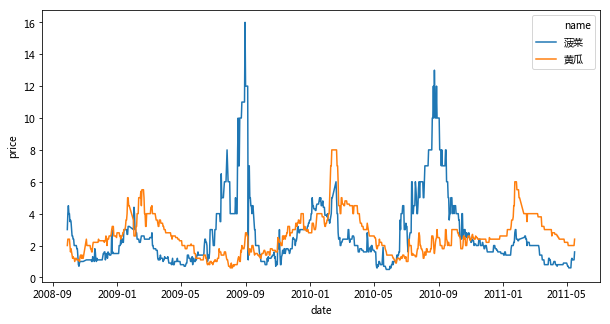

In [42]:
plt.figure(figsize=(10,5))
d1=pd.DataFrame(data=train['菠菜'].values.astype(np.float64),columns=['price'])
d1['date']=date
d1['name']='菠菜'
d2=pd.DataFrame(data=train['黄瓜'].values.astype(np.float64),columns=['price'])
d2['date']=date
d2['name']='黄瓜'
sns.lineplot(x='date',y='price',data=pd.concat([d1,d2]),hue='name')

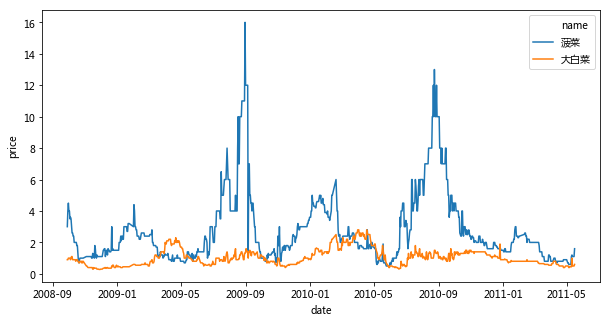

In [44]:
plt.figure(figsize=(10,5))
d1=pd.DataFrame(data=train['菠菜'].values.astype(np.float64),columns=['price'])
d1['date']=date
d1['name']='菠菜'
d2=pd.DataFrame(data=train['大白菜'].values.astype(np.float64),columns=['price'])
d2['date']=date
d2['name']='大白菜'
sns.lineplot(x='date',y='price',data=pd.concat([d1,d2]),hue='name')

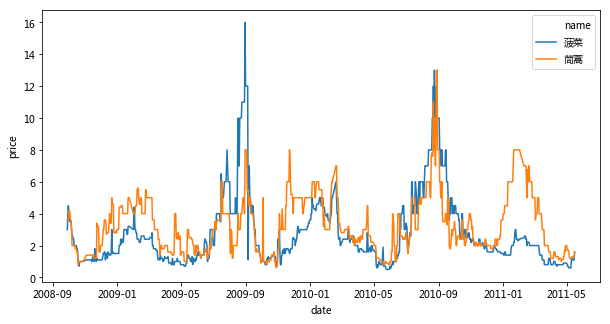

In [45]:
plt.figure(figsize=(10,5))
d1=pd.DataFrame(data=train['菠菜'].values.astype(np.float64),columns=['price'])
d1['date']=date
d1['name']='菠菜'
d2=pd.DataFrame(data=train['茼蒿'].values.astype(np.float64),columns=['price'])
d2['date']=date
d2['name']='茼蒿'
sns.lineplot(x='date',y='price',data=pd.concat([d1,d2]),hue='name')

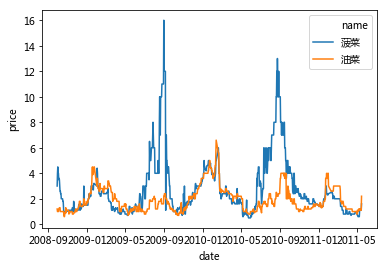

In [24]:
plt.figure(figsize=(10,5))
d1=pd.DataFrame(data=train['菠菜'].values.astype(np.float64),columns=['price'])
d1['date']=date
d1['name']='菠菜'
d2=pd.DataFrame(data=train['油菜'].values.astype(np.float64),columns=['price'])
d2['date']=date
d2['name']='油菜'
sns.lineplot(x='date',y='price',data=pd.concat([d1,d2]),hue='name')